# Traitement de signal
## Atelier \#5 : Transformée de Fourier
### Support de cours disponible à l'adresse : [https://www.github.com/a-mhamdi/shelf_textbook](https://www.github.com/a-mhamdi/shelf_textbook)

---

Rappelons d'abord la définition de la transformée de Fourier d'un signal $x$, soit encore $\mathfrak{F}\left\{x(t)\right\}$ qu'on dénote par $\mathcal{X}(f)$ :

$$
\mathcal{X}(f) \;=\; \displaystyle\int_{-\infty}^{+\infty}x(t)\mathrm{e}^{-2\jmath\pi f t}\,dt
$$

Par examen de cette transformation, nous observons qu'il est impossible d'implémenter cette intégrale en temps continu sur un calculateur. Ce dernier ne travaille que sur des valeurs discrètes, nous ferons recours à la *Transformée de Fourier Discrète*. Elle consiste d'abord à discrétiser et à tronquer $x$ en une série $x_0,\,\cdots,\, x_{n-1}$. Les coefficients discrets de $\mathcal{X}(f)$ sont calculés par la suite conformément à la formule suivante :

$$
\mathcal{X}_l \;=\; \displaystyle\sum_{p=0}^{n-1} x_p \mathrm{e}^{-\displaystyle\frac{2\jmath\pi pl}{n}}, \quad\text{avec}\quad l\,=\,0,\,\cdots,\, n-1
$$

Néanmoins, le calcul des coefficients $\mathcal{X}_l$, pour $l\,=\,0,\,\cdots,\, n-1$, à partir de la définition est souvent gourmand en temps. Un autre algorithme très répandu dans les applications d’ingénierie est la *Transformée de Fourier Rapide*, souvent abrégée *FFT*. Cette approche de calcul permet de réduire énormément la complexité du calcul des termes susmentionnés.

Une explication détaillée avec une implémentation en **Python** est accessible via le lien suivant : [https://towardsdatascience.com/fast-fourier-transform-937926e591cb](https://towardsdatascience.com/fast-fourier-transform-937926e591cb)

Commençons d'abord par importer les modules requis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]

Nous générons maintenant un signal $x$ définit par :

$$
x(t) \;=\; \displaystyle\sum_{k=1}^{6} \mathcal{A}k \cos\left(2 \mathcal{A}k \pi t\right) \quad \text{avec}\quad \mathcal{A} = 10\,\text{Hz}.
$$

In [2]:
nb_pts = 1000 # Nombre de points
Delta_t = 0.001 # Période d'échantillonnage
t = np.linspace(0.0, nb_pts * Delta_t, nb_pts) # Vecteur temps
wt = 2.0 * np.pi * t
x_lst = [10 * k * np.cos(10 * k * wt) for k in range(1, 7)]
xmat_t = np.asarray(x_lst, dtype = np.float32)
x_t = np.sum(xmat_t, axis=0)

Text(0.5, 0, '$t$ (sec)')

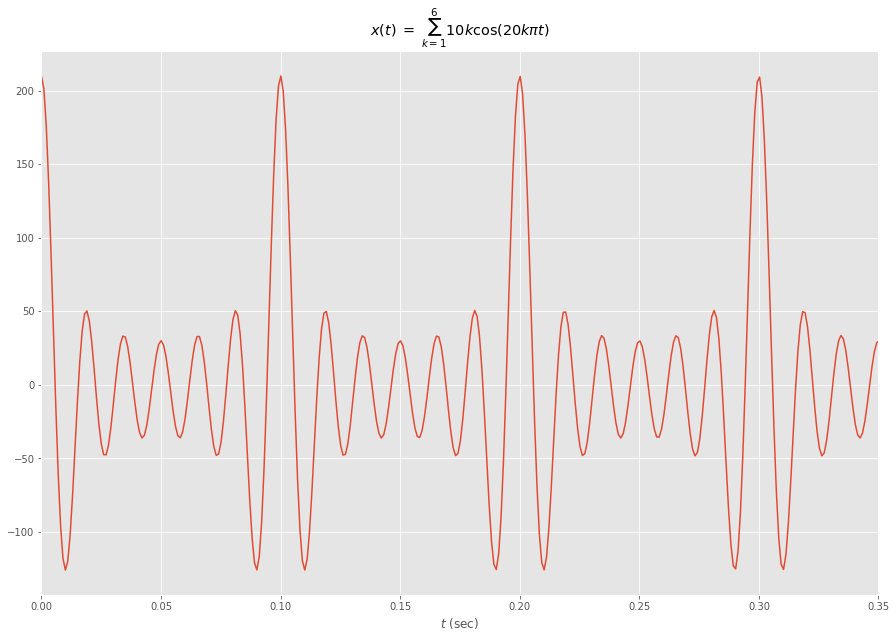

In [3]:
plt.plot(t, x_t)
plt.title(r'$x(t) \;=\; \sum_{k=1}^{6} 10 k \cos\left(20 k \pi t\right)$')
plt.xlim(0, 0.35)
plt.xlabel("$t$ (sec)")

Appliquons la transformée Fourier rapide *(en: FFT ou Fast Fourier Transform)* de $x(t)$. La quantité **x_f** dénote $\mathcal{X}(f)$.

In [4]:
x_f = np.fft.fft(x_t)
freqs = np.fft.fftfreq(nb_pts, Delta_t)

Traçons par la suite les parties réelle et imaginaire de $\mathcal{X}(f)$

(0.0, 100.0)

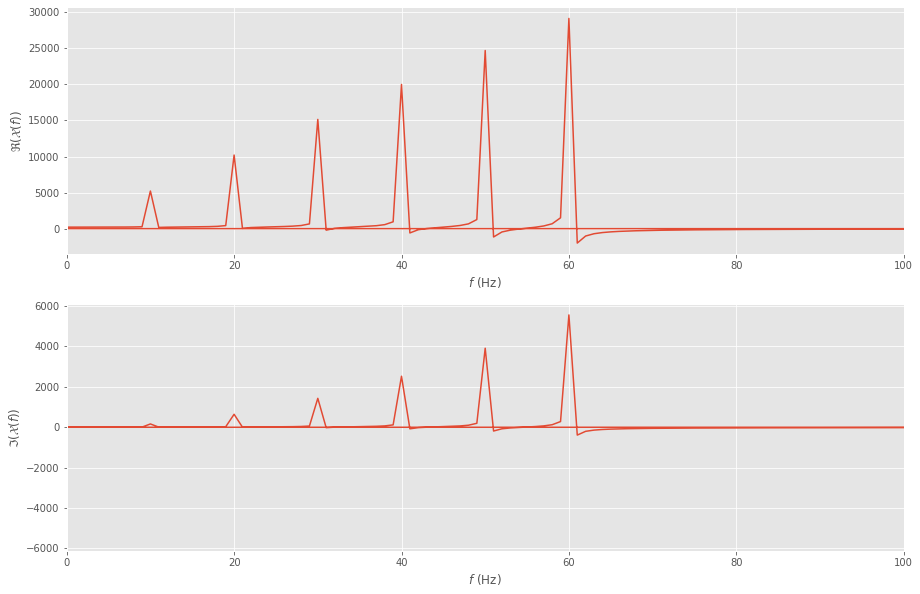

In [5]:
plt.subplot(2, 1, 1)
plt.plot(freqs, x_f.real)
plt.xlabel("$f$ (Hz)")
plt.ylabel("$\Re(\mathcal{X}(f))$")
plt.xlim(0, 100)
plt.subplot(2, 1, 2)
plt.plot(freqs, x_f.imag)
plt.xlabel("$f$ (Hz)")
plt.ylabel("$\Im(\mathcal{X}(f))$")
plt.xlim(0, 100)

Une autre manière de présentation de $\mathcal{X}(f)$ est de tracer les graphes de $\left|\mathcal{X}(f)\right|$ et $\angle{\mathcal{X}(f)}$.

(0.0, 100.0)

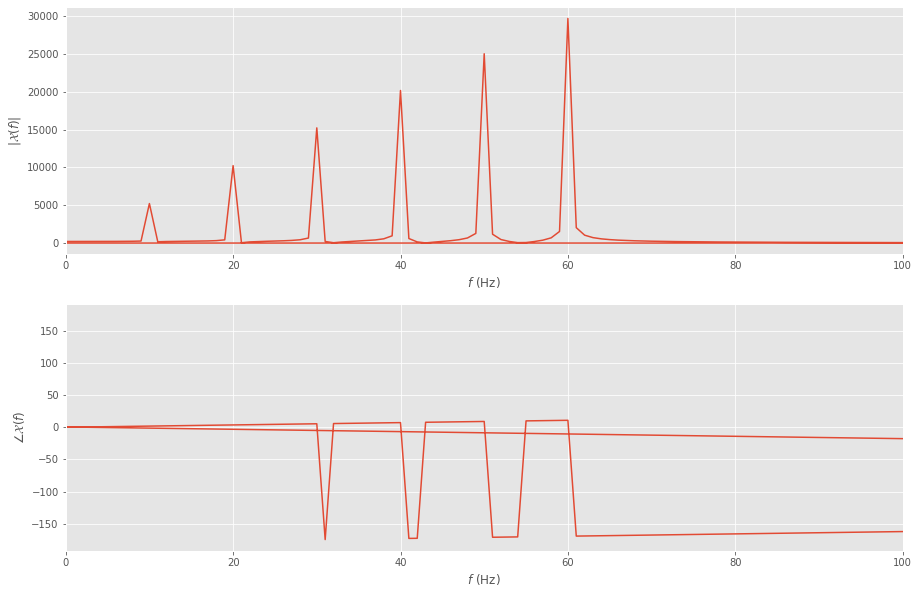

In [6]:
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(x_f))
plt.xlabel("$f$ (Hz)")
plt.ylabel(r"$\left|\mathcal{X}(f)\right|$")
plt.xlim(0, 100)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.angle(x_f, deg = True))
plt.xlabel("$f$ (Hz)")
plt.ylabel(r"$\angle{\mathcal{X}(f)}$")
plt.xlim(0, 100)

Essayons de reconstruire $x(t)$ par application de la transformée de Fourier inverse **ifft** *(en: Inverse Fast Fourier Transform)*.

Text(0.5, 0, '$t$ (sec)')

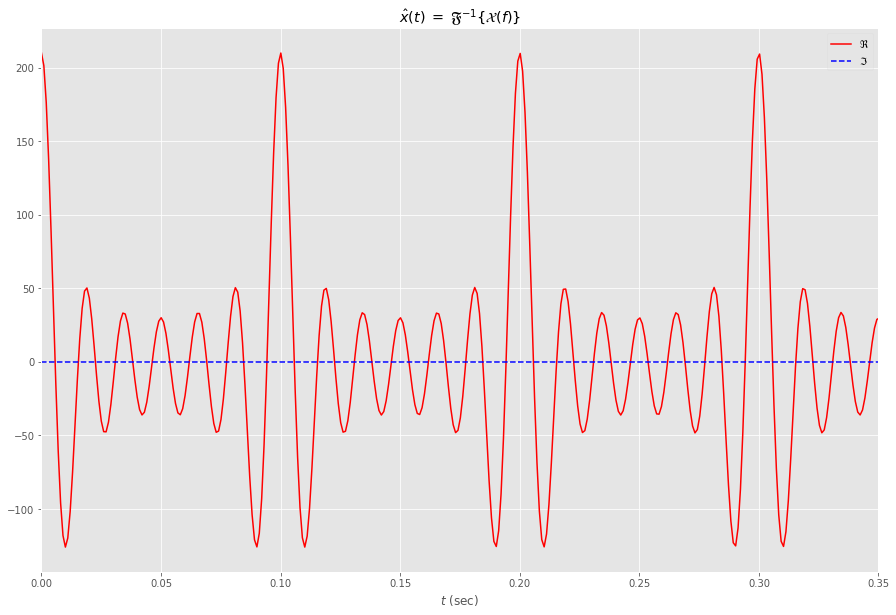

In [7]:
x_t_app = np.fft.ifft(x_f)
plt.plot(t, x_t_app.real, '-r', t, x_t_app.imag, '--b')
plt.title(r'$\hat{x}(t) \;=\; \mathfrak{F}^{-1}\left\{\mathcal{X}(f)\right\}$')
plt.legend(['$\Re$', '$\Im$'], fancybox=True, framealpha=0.3, loc='best')
plt.xlim(0, 0.35)
plt.xlabel("$t$ (sec)")